<a href="https://colab.research.google.com/github/keshav1999/Keras_MNIST/blob/master/Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:

import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [0]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 1256
nb_epoch = 32

In [0]:
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:

from keras.models import Sequential 
from keras.layers import Dense, Activation 


# 2 Layer model

In [0]:
from keras.layers import Dropout,BatchNormalization
model = Sequential()
model.add(Dense(392,activation='relu',input_shape = (input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.071, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(196,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.101, seed=None) ))
model.add(BatchNormalization())
model.add(Dense(output_dim , activation = 'softmax'))
model.summary()























_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 392)               307720    
_________________________________________________________________
batch_normalization_3 (Batch (None, 392)               1568      
_________________________________________________________________
dropout_2 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 196)               77028     
_________________________________________________________________
batch_normalization_4 (Batch (None, 196)               784       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1970      
Total params: 389,070
Trainable params: 387,894
Non-trainable params: 1,176
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 5s 76us/step - loss: 2.0240 - acc: 0.3371 - val_loss: 1.2078 - val_acc: 0.6203
Epoch 2/32
60000/60000 [==============================] - 4s 61us/step - loss: 1.3028 - acc: 0.5710 - val_loss: 0.8444 - val_acc: 0.7565
Epoch 3/32
60000/60000 [==============================] - 4s 61us/step - loss: 1.0220 - acc: 0.6734 - val_loss: 0.6844 - val_acc: 0.8043
Epoch 4/32
60000/60000 [==============================] - 4s 61us/step - loss: 0.8728 - acc: 0.7242 - val_loss: 0.5929 - val_acc: 0.8316
Epoch 5/32
60000/60000 [==============================] - 4s 62us/step - loss: 0.7824 - acc: 0.7559 - val_loss: 0.5333 - val_acc: 0.8488
Epoch 6/32
60000/60000 [==============================] - 4s 60us/step - loss: 0.7119 - acc: 0.7797 - val_loss: 0.4903 - val_acc: 0.8602
Epoch 7/32
60000/60000 [==============================] - 4s 61us/step - loss: 0.6604 - acc: 0.7952 - val_loss: 0.4576 - val_acc

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
#plt_dynamic(x, vy, ty, ax)

Test score: 0.24783922684937715
Test accuracy: 0.9289


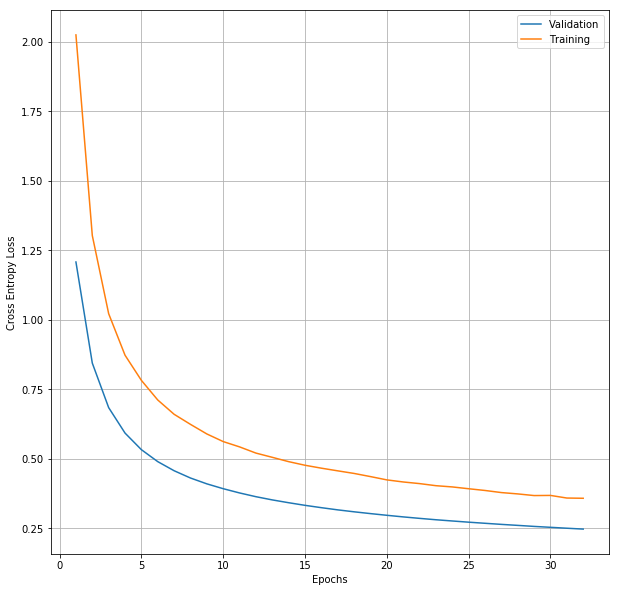

In [0]:
plt.figure(figsize=(10,10))
plt.plot(x,vy,label = "Validation")
plt.plot(x,ty,label = 'Training')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.grid()
plt.show()

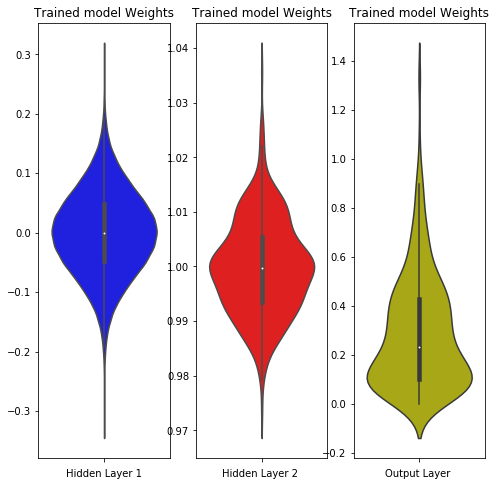

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

plt.figure(figsize=(8,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 5s 82us/step - loss: 0.2672 - acc: 0.9187 - val_loss: 0.1442 - val_acc: 0.9577
Epoch 2/32
60000/60000 [==============================] - 4s 63us/step - loss: 0.1746 - acc: 0.9466 - val_loss: 0.1127 - val_acc: 0.9657
Epoch 3/32
60000/60000 [==============================] - 4s 64us/step - loss: 0.1373 - acc: 0.9584 - val_loss: 0.0991 - val_acc: 0.9690
Epoch 4/32
60000/60000 [==============================] - 4s 63us/step - loss: 0.1167 - acc: 0.9641 - val_loss: 0.0889 - val_acc: 0.9720
Epoch 5/32
60000/60000 [==============================] - 4s 64us/step - loss: 0.1007 - acc: 0.9689 - val_loss: 0.0831 - val_acc: 0.9752
Epoch 6/32
60000/60000 [==============================] - 4s 64us/step - loss: 0.0887 - acc: 0.9727 - val_loss: 0.0760 - val_acc: 0.9769
Epoch 7/32
60000/60000 [==============================] - 4s 64us/step - loss: 0.0791 - acc: 0.9750 - val_loss: 0.0719 - val_acc

Test score: 0.055731013571828955
Test accuracy: 0.9844


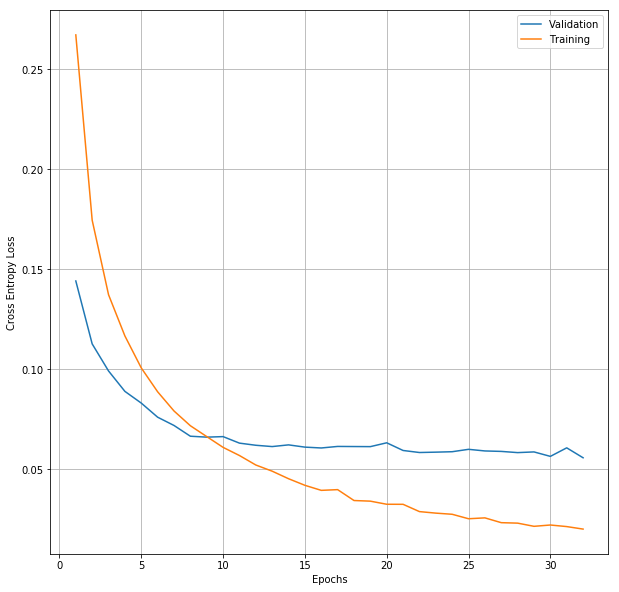

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
#plt_dynamic(x, vy, ty, ax)
plt.figure(figsize=(10,10))
plt.plot(x,vy,label = "Validation")
plt.plot(x,ty,label = 'Training')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.grid()
plt.show()

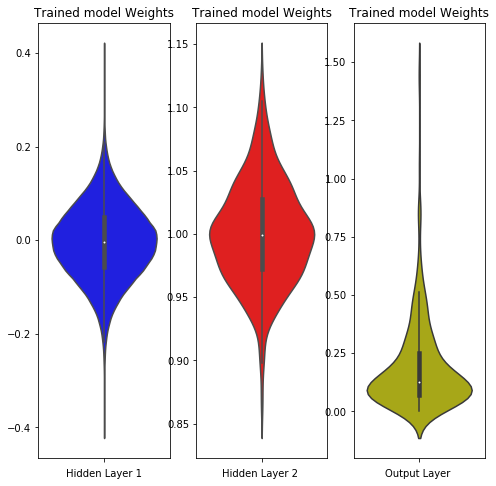

In [0]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

plt.figure(figsize=(8,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# **3 Layered model**

In [38]:
from keras.layers import Dropout,BatchNormalization
model = Sequential()
model.add(Dense(392,activation='relu',input_shape = (input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.071, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(196,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.101, seed=None) ))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(98,activation = 'relu',kernel_initializer=RandomNormal(mean =0.0 ,stddev=0.142, seed = None)))
model.add(BatchNormalization())
model.add(Dense(output_dim , activation = 'softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 392)               307720    
_________________________________________________________________
batch_normalization_5 (Batch (None, 392)               1568      
_________________________________________________________________
dropout_3 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 196)               77028     
_________________________________________________________________
batch_normalization_6 (Batch (None, 196)               784       
_________________________________________________________________
dropout_4 (Dropout)          (None, 196)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 98)                19306     
__________

In [39]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 6s 99us/step - loss: 2.5803 - acc: 0.1927 - val_loss: 1.6668 - val_acc: 0.4606
Epoch 2/32
60000/60000 [==============================] - 4s 70us/step - loss: 1.8727 - acc: 0.3789 - val_loss: 1.2121 - val_acc: 0.6378
Epoch 3/32
60000/60000 [==============================] - 4s 70us/step - loss: 1.4960 - acc: 0.5038 - val_loss: 0.9660 - val_acc: 0.7305
Epoch 4/32
60000/60000 [==============================] - 4s 70us/step - loss: 1.2702 - acc: 0.5832 - val_loss: 0.8117 - val_acc: 0.7810
Epoch 5/32
60000/60000 [==============================] - 4s 71us/step - loss: 1.1224 - acc: 0.6366 - val_loss: 0.7108 - val_acc: 0.8126
Epoch 6/32
60000/60000 [==============================] - 4s 69us/step - loss: 1.0064 - acc: 0.6789 - val_loss: 0.6394 - val_acc: 0.8304
Epoch 7/32
60000/60000 [==============================] - 4s 71us/step - loss: 0.9318 - acc: 0.7030 - val_loss: 0.5855 - val_acc

Test score: 0.27700074823200704
Test accuracy: 0.9168


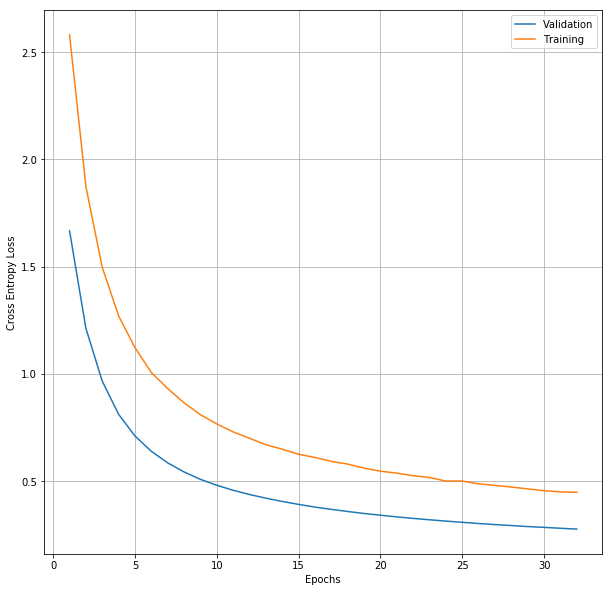

In [40]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
#plt_dynamic(x, vy, ty, ax)
plt.figure(figsize=(10,10))
plt.plot(x,vy,label = "Validation")
plt.plot(x,ty,label = 'Training')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.grid()
plt.show()

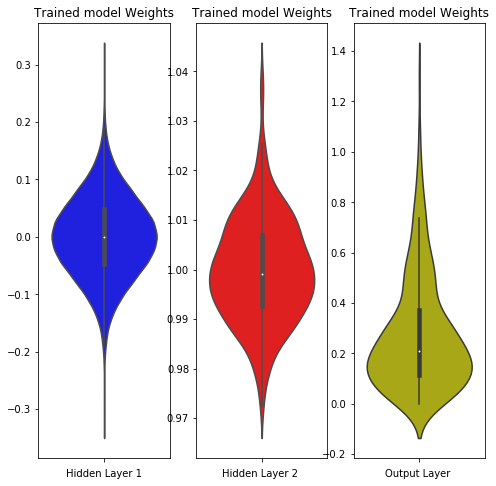

In [41]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

plt.figure(figsize=(8,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 6s 102us/step - loss: 0.3297 - acc: 0.8989 - val_loss: 0.1634 - val_acc: 0.9488
Epoch 2/32
60000/60000 [==============================] - 4s 71us/step - loss: 0.2179 - acc: 0.9326 - val_loss: 0.1252 - val_acc: 0.9610
Epoch 3/32
60000/60000 [==============================] - 4s 70us/step - loss: 0.1798 - acc: 0.9445 - val_loss: 0.1098 - val_acc: 0.9657
Epoch 4/32
60000/60000 [==============================] - 4s 70us/step - loss: 0.1510 - acc: 0.9535 - val_loss: 0.0978 - val_acc: 0.9695
Epoch 5/32
60000/60000 [==============================] - 4s 71us/step - loss: 0.1363 - acc: 0.9569 - val_loss: 0.0901 - val_acc: 0.9723
Epoch 6/32
60000/60000 [==============================] - 4s 70us/step - loss: 0.1195 - acc: 0.9626 - val_loss: 0.0849 - val_acc: 0.9744
Epoch 7/32
60000/60000 [==============================] - 4s 70us/step - loss: 0.1096 - acc: 0.9657 - val_loss: 0.0791 - val_ac

Test score: 0.059048169637560204
Test accuracy: 0.9841


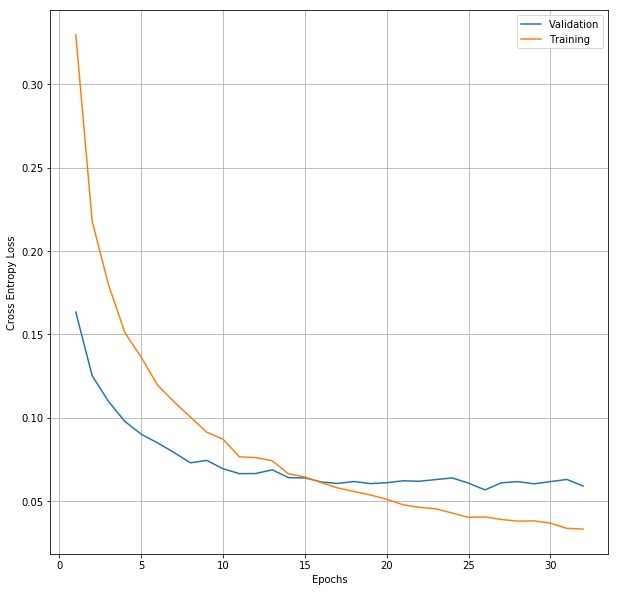

In [43]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
#plt_dynamic(x, vy, ty, ax)
plt.figure(figsize=(10,10))
plt.plot(x,vy,label = "Validation")
plt.plot(x,ty,label = 'Training')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.grid()
plt.show()

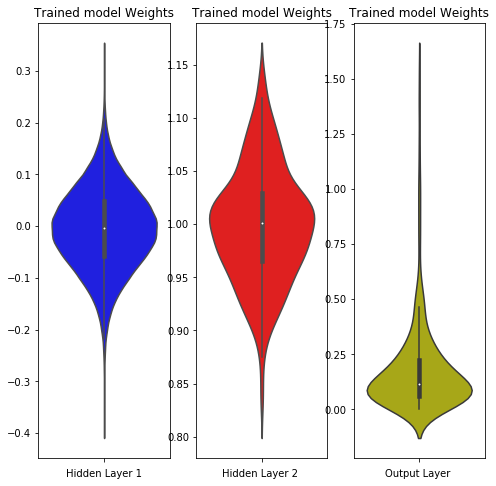

In [44]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

plt.figure(figsize=(8,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 5 layer Model

In [45]:
from keras.layers import Dropout,BatchNormalization
model = Sequential()
model.add(Dense(588,activation='relu',input_shape = (input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(392,activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.071, seed=None) ))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(294,activation = 'relu',kernel_initializer=RandomNormal(mean =0.0 ,stddev=0.0824, seed = None)))
model.add(Dropout(0.5))
model.add(Dense(196,activation = 'relu',kernel_initializer=RandomNormal(mean =0.0 ,stddev=0.101, seed = None)))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(98,activation = 'relu',kernel_initializer=RandomNormal(mean =0.0 ,stddev =0.142 ,seed = None)))
model.add(BatchNormalization())
model.add(Dense(output_dim , activation = 'softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 588)               461580    
_________________________________________________________________
batch_normalization_8 (Batch (None, 588)               2352      
_________________________________________________________________
dropout_5 (Dropout)          (None, 588)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 392)               230888    
_________________________________________________________________
batch_normalization_9 (Batch (None, 392)               1568      
_________________________________________________________________
dropout_6 (Dropout)          (None, 392)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 294)               115542    
__________

In [46]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 11s 179us/step - loss: 2.9841 - acc: 0.1082 - val_loss: 2.3406 - val_acc: 0.1116
Epoch 2/32
60000/60000 [==============================] - 8s 140us/step - loss: 2.6893 - acc: 0.1470 - val_loss: 2.1005 - val_acc: 0.2369
Epoch 3/32
60000/60000 [==============================] - 8s 140us/step - loss: 2.4869 - acc: 0.1843 - val_loss: 1.9195 - val_acc: 0.3913
Epoch 4/32
60000/60000 [==============================] - 8s 139us/step - loss: 2.3047 - acc: 0.2278 - val_loss: 1.7639 - val_acc: 0.4741
Epoch 5/32
60000/60000 [==============================] - 8s 140us/step - loss: 2.1557 - acc: 0.2667 - val_loss: 1.6272 - val_acc: 0.5246
Epoch 6/32
60000/60000 [==============================] - 8s 139us/step - loss: 2.0159 - acc: 0.3106 - val_loss: 1.5060 - val_acc: 0.5612
Epoch 7/32
60000/60000 [==============================] - 8s 141us/step - loss: 1.9007 - acc: 0.3494 - val_loss: 1.4005 -

Test score: 0.4749928286552429
Test accuracy: 0.8629


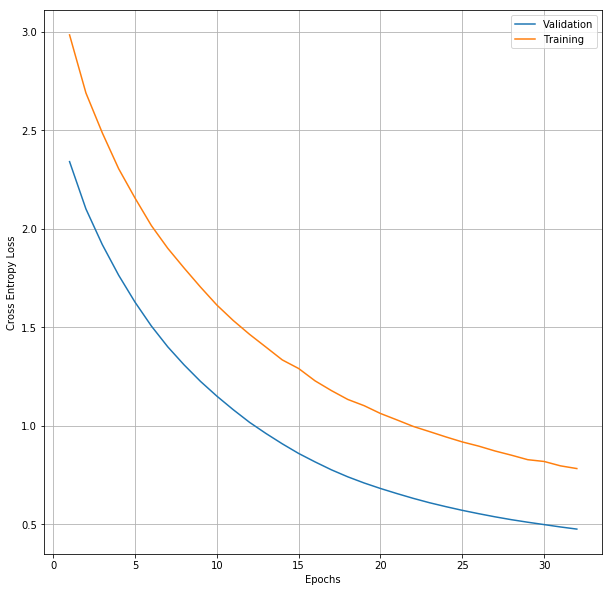

In [47]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
#plt_dynamic(x, vy, ty, ax)
plt.figure(figsize=(10,10))
plt.plot(x,vy,label = "Validation")
plt.plot(x,ty,label = 'Training')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.grid()
plt.show()

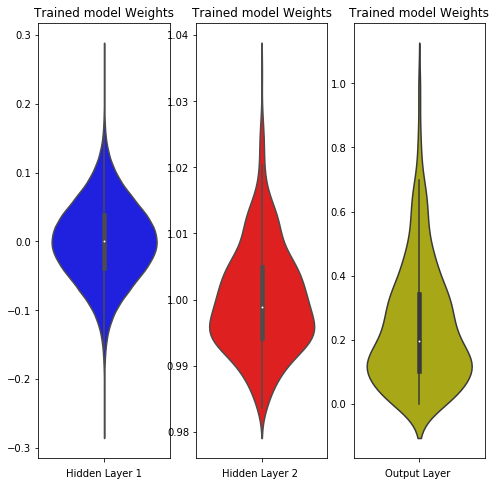

In [48]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

plt.figure(figsize=(8,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/32
60000/60000 [==============================] - 12s 193us/step - loss: 0.5075 - acc: 0.8425 - val_loss: 0.2906 - val_acc: 0.9322
Epoch 2/32
60000/60000 [==============================] - 9s 146us/step - loss: 0.2945 - acc: 0.9122 - val_loss: 0.2125 - val_acc: 0.9477
Epoch 3/32
60000/60000 [==============================] - 9s 146us/step - loss: 0.2234 - acc: 0.9334 - val_loss: 0.1585 - val_acc: 0.9597
Epoch 4/32
60000/60000 [==============================] - 9s 146us/step - loss: 0.1855 - acc: 0.9467 - val_loss: 0.1405 - val_acc: 0.9647
Epoch 5/32
60000/60000 [==============================] - 9s 146us/step - loss: 0.1593 - acc: 0.9527 - val_loss: 0.1219 - val_acc: 0.9692
Epoch 6/32
60000/60000 [==============================] - 9s 146us/step - loss: 0.1411 - acc: 0.9590 - val_loss: 0.1074 - val_acc: 0.9708
Epoch 7/32
60000/60000 [==============================] - 9s 147us/step - loss: 0.1251 - acc: 0.9632 - val_loss: 0.1002 -

Test score: 0.06627133523290395
Test accuracy: 0.9844


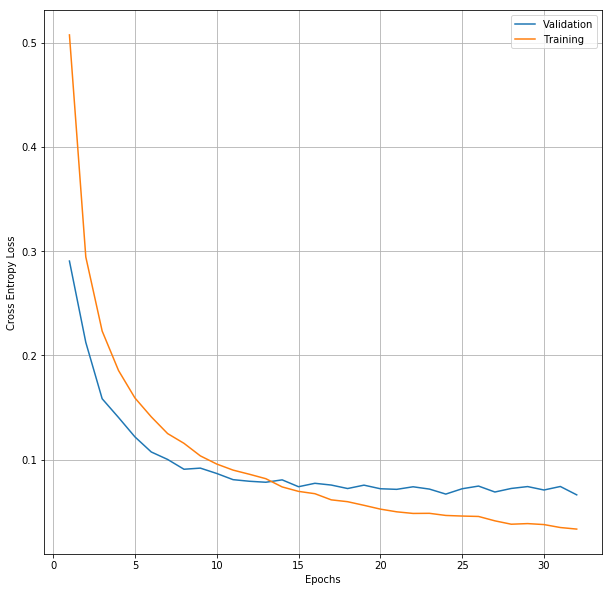

In [50]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])


# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
#plt_dynamic(x, vy, ty, ax)
plt.figure(figsize=(10,10))
plt.plot(x,vy,label = "Validation")
plt.plot(x,ty,label = 'Training')
plt.xlabel("Epochs")
plt.ylabel("Cross Entropy Loss")
plt.legend()
plt.grid()
plt.show()

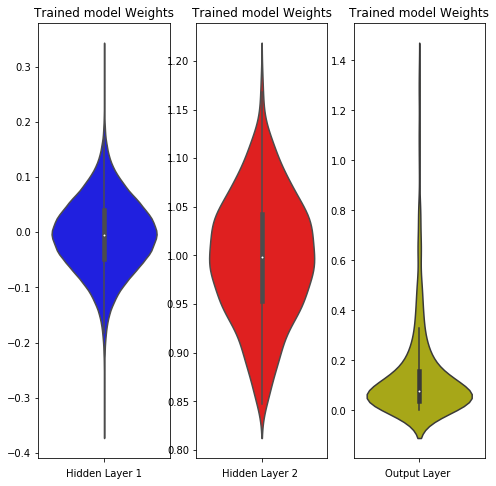

In [51]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

plt.figure(figsize=(8,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Conclusion

In [54]:
from prettytable import PrettyTable
x= PrettyTable()
x.field_names = ["Model","Train Error","Train Accuracy","Val Error", "Val Accuracy"]
x.add_row(["SGD on 2 Layer Model",.35,.89,.24,.92])
x.add_row(["Adam on 2 Layer Modle",.02,.99,.05,.98])
x.add_row(["SGD on 3 Layer Model",.44,.86,.27,.91])
x.add_row(["Adam on 3 Layer Model",.03,.98,.05,.98])
x.add_row(["SGD on 5 Layer Model",.78,.74,.47,.86])
x.add_row(["Adam on 5 Layer Model",.03,.98,.06,.98])
print(x)

+-----------------------+-------------+----------------+-----------+--------------+
|         Model         | Train Error | Train Accuracy | Val Error | Val Accuracy |
+-----------------------+-------------+----------------+-----------+--------------+
|  SGD on 2 Layer Model |     0.35    |      0.89      |    0.24   |     0.92     |
| Adam on 2 Layer Modle |     0.02    |      0.99      |    0.05   |     0.98     |
|  SGD on 3 Layer Model |     0.44    |      0.86      |    0.27   |     0.91     |
| Adam on 3 Layer Model |     0.03    |      0.98      |    0.05   |     0.98     |
|  SGD on 5 Layer Model |     0.78    |      0.74      |    0.47   |     0.86     |
| Adam on 5 Layer Model |     0.03    |      0.98      |    0.06   |     0.98     |
+-----------------------+-------------+----------------+-----------+--------------+
